# Escola de Inverno - IESP-UERJ - 2023

## Introdução à Ciência de Dados
Matheus C. Pestana

### Modelos abertos: texto, áudio, vídeo

In [1]:
!pip install transformers datasets xformers sentencepiece openai-whisper diffusers accelerate safetensors invisible_watermark
!pip install git+https://github.com/suno-ai/bark.git

  Cloning https://github.com/suno-ai/bark.git to /tmp/pip-req-build-gnkvz0g7
  Running command git clone --filter=blob:none --quiet https://github.com/suno-ai/bark.git /tmp/pip-req-build-gnkvz0g7
  Resolved https://github.com/suno-ai/bark.git to commit 56b0ba13f7c281cbffa07ea9abf7b30273a60b6a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


## Testando o GPT-2

In [17]:
from transformers import pipeline
gpt2 = pipeline('text-generation', model='gpt2-large', device='cuda')

In [21]:
frases = gpt2("Now I am become Death, the destroyer of Worlds, and", max_length=300, num_return_sequences=1)
for frase in frases:
  print(frase['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Now I am become Death, the destroyer of Worlds, and I have set the Earth free...

And if they come for thee, ye shall know them, and shall know them by their fruits. They that go down to the great depths of the sea shall find a green land, whereon they will plant vineyards and know fruit. And these men will not take of the tree of knowledge, for in the day that ye eat of it ye shall die. And also the men of Nineveh shall hear and they shall eat fruit, for their worm shall not die, and they shall not die of the worm no, only their eye shall perish.

A man was driving a flail at Idris. When he saw a man who held Idris by his beard, the man struck one of Idris's heads off in his flail, and the flail became broken. And Idris became a sea monster, with large eyes and a mouth the size of a man's fist. Now Idris is a great man, but he and his flail are one, and they have grown a great deal, and they have been eaten by men of Nineveh.

But the man who has gone down to the sea shall not become 

In [ ]:
del gpt2

## Testando modelos difusores

In [2]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.19.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "An astronaut riding a green horse"

images = pipe(prompt=prompt).images[0]

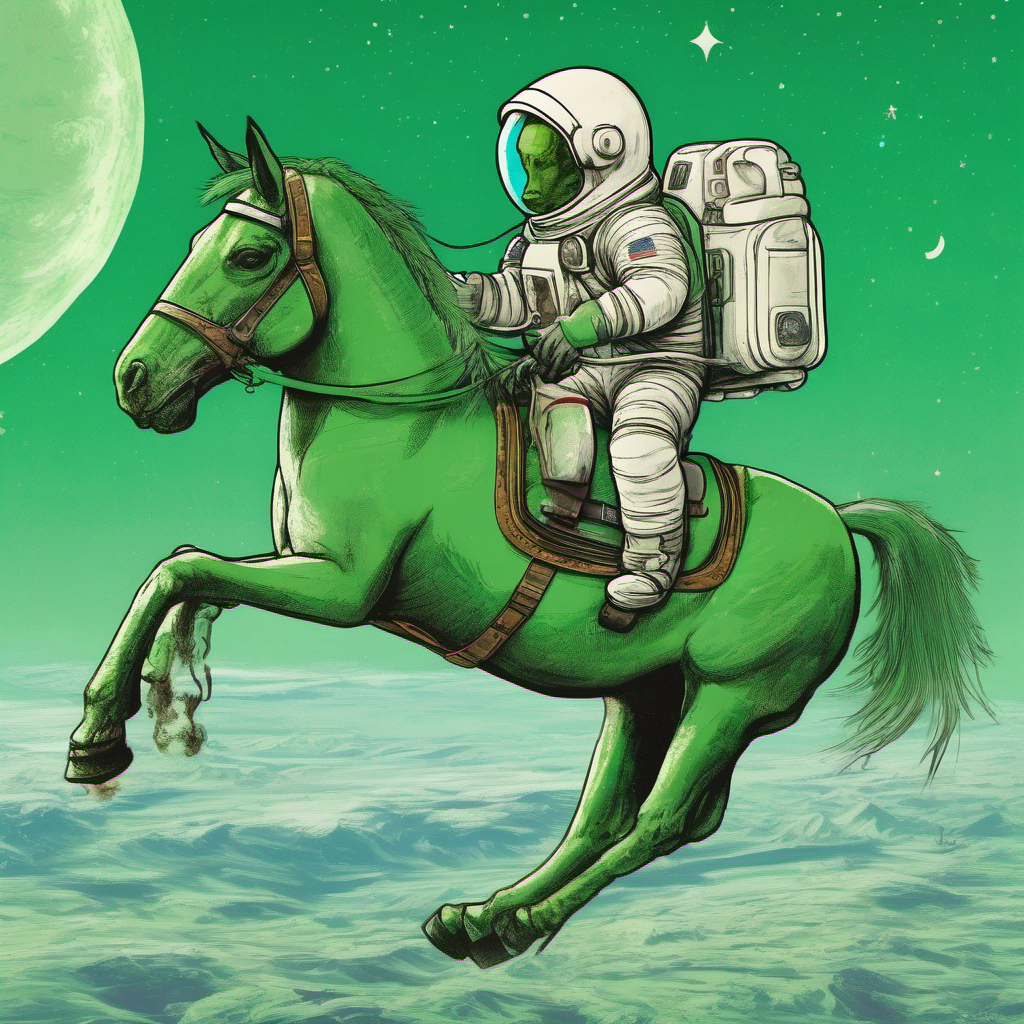

In [26]:
display(images)

  0%|          | 0/50 [00:00<?, ?it/s]

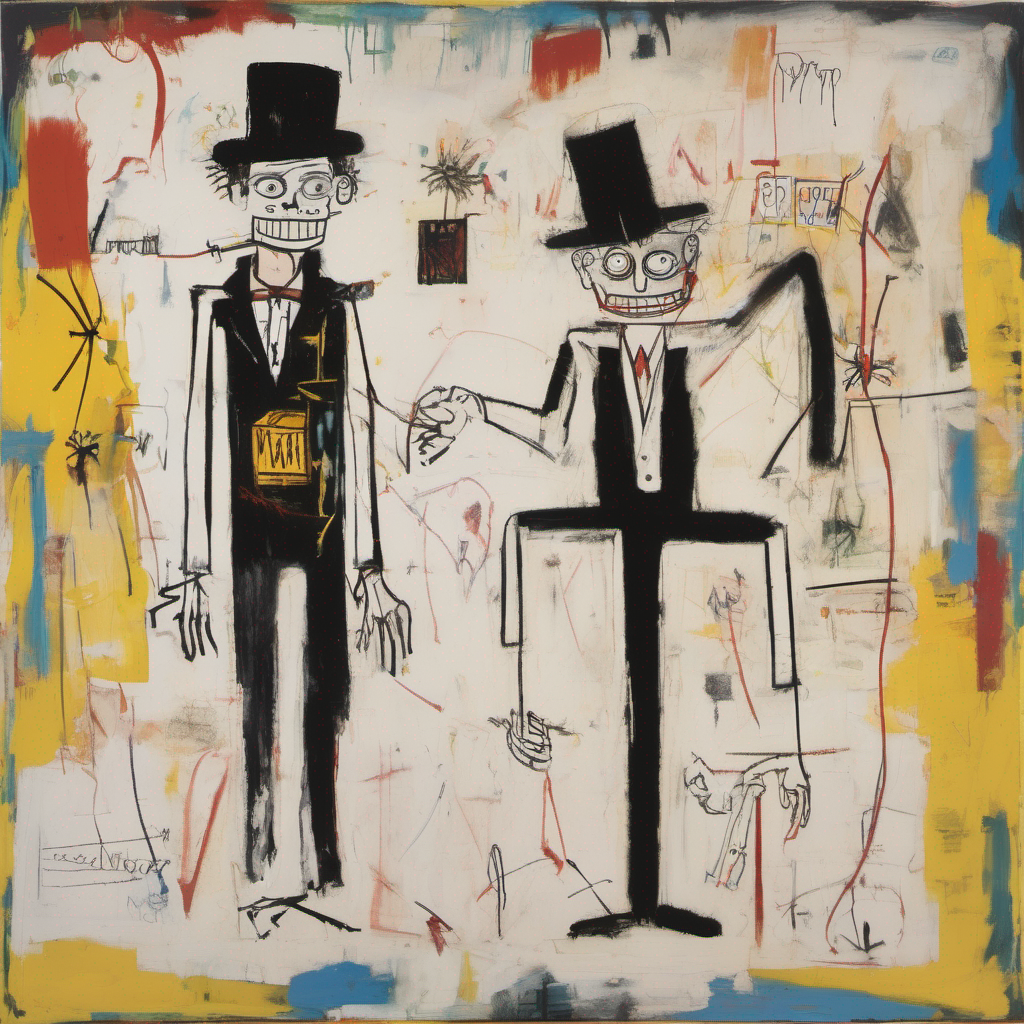

In [3]:
def gera_imagem(prompt):
  imagem = pipe(prompt=prompt).images[0]
  display(imagem)

gera_imagem('A magician, by Basquiat')

  0%|          | 0/50 [00:00<?, ?it/s]

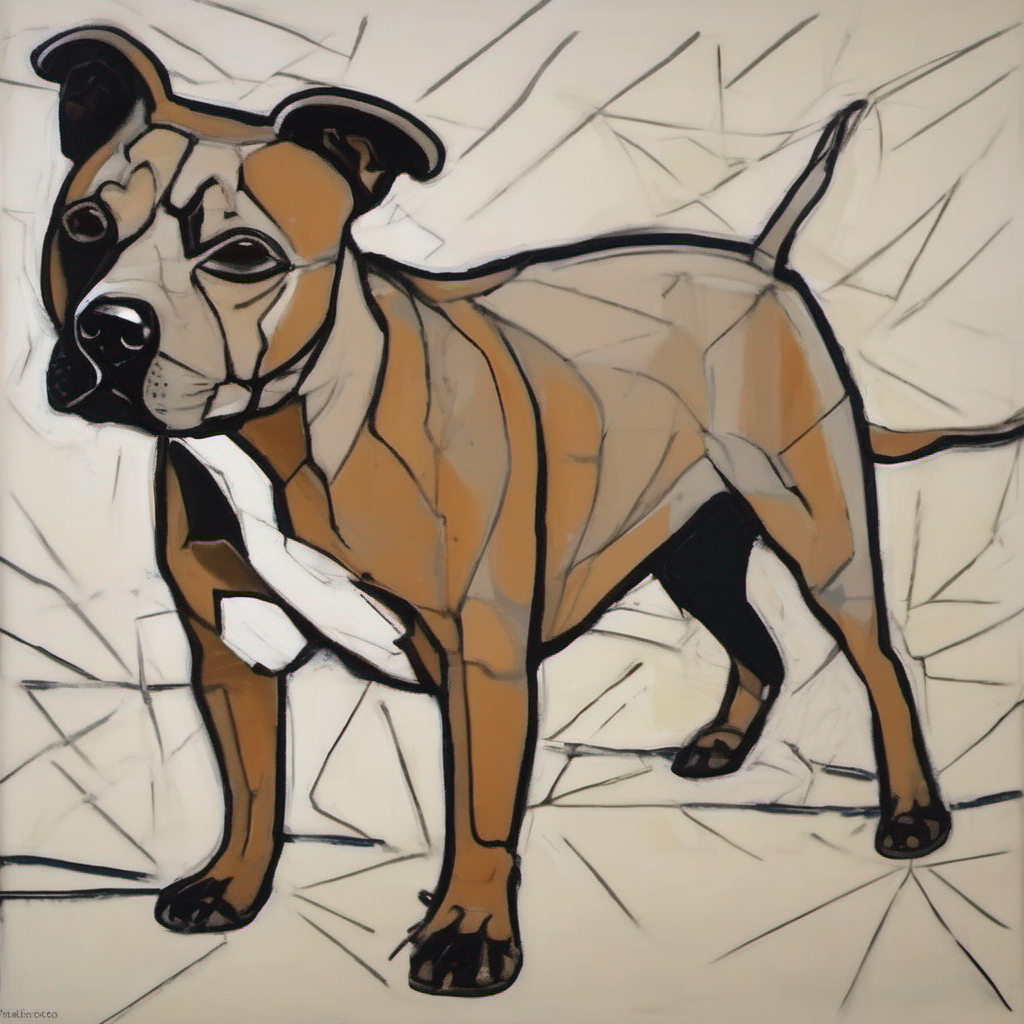

In [4]:
gera_imagem('A staffordshire bull terrier, by Picasso')

  0%|          | 0/50 [00:00<?, ?it/s]

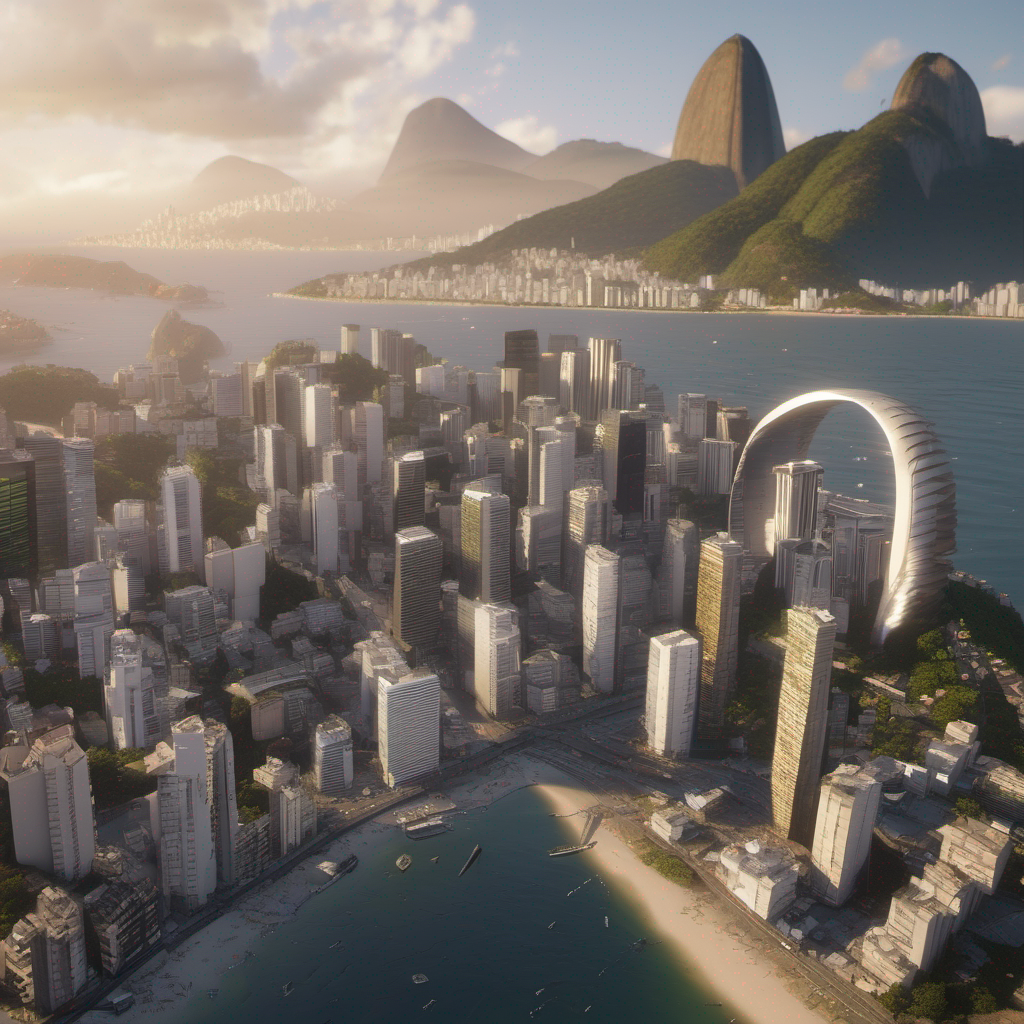

In [5]:
gera_imagem('Rio de Janeiro as a futuristic city, ultrarealistic, 8k, unreal engine')

# Gerando voz com o Bark

In [2]:
from bark import SAMPLE_RATE, generate_audio, preload_models
from scipy.io.wavfile import write as write_wav
from IPython.display import Audio

preload_models()

text_prompt = """
     Oi, meu nome é Mateus. É importante lembrar que os dados não falam por si: nós falamos através deles.
"""
audio_array = generate_audio(text_prompt)

write_wav("bark_generation.wav", SAMPLE_RATE, audio_array)

Audio(audio_array, rate=SAMPLE_RATE)

Downloading: "https://dl.fbaipublicfiles.com/encodec/v0/encodec_24khz-d7cc33bc.th" to /root/.cache/torch/hub/checkpoints/encodec_24khz-d7cc33bc.th
100%|██████████| 88.9M/88.9M [00:00<00:00, 99.7MB/s]
100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


### Transcrevendo textos com o Whisper

In [3]:
from datetime import timedelta
from whisper import load_model

model = load_model('medium', device='cuda')

100%|█████████████████████████████████████| 1.42G/1.42G [00:44<00:00, 34.3MiB/s]


In [4]:
audio = 'bark_generation.wav'
resultado = model.transcribe(audio, verbose=True)

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: Portuguese
[00:00.000 --> 00:07.320]  Oi, meu nome é Mateus e é importante lembrar que os dados não falam por si, nós falamos através de eles.


In [5]:
with open('resultado.txt', 'w') as arquivo:
  arquivo.write(resultado['text'])

transcricao = []

for segmento in resultado['segments']:
  start = timedelta(seconds=segmento['start'])
  end = timedelta(seconds=segmento['end'])
  text = segmento['text']
  transcricao.append(f'[{start} --> {end}] {text}\n')

with open('resultado_minutagem.txt', 'w') as arquivo:
  arquivo.write(''.join(transcricao))